# Machine Learning (ML) Project
Name:Tanuja D Gopale

Email id :tanujawalunj1710@gmail, cont:9356858216

Linkedin ID: https://www.linkedin.com/in/tanuja076/

Project2- ML Titanic Disaster:

In [1]:
#Importing all the required libraries:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

In [52]:
#load the data

df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
#count the number of rows and columns in the data set
df.shape

(891, 12)

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
#count the number of empty (NaN)Values in each column
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#Filling age data for better accuracy:

def fillage(cols):
    age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(age)):
        if(Pclass==1):
            return 38
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return age

In [16]:
df["Age"]=df[["Age","Pclass"]].apply(fillage,axis=1)
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

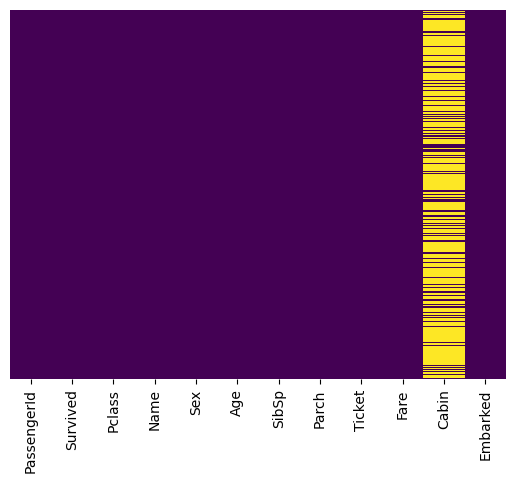

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [55]:
#Drop the column with the all mising values

df.dropna(inplace=True)

<Axes: >

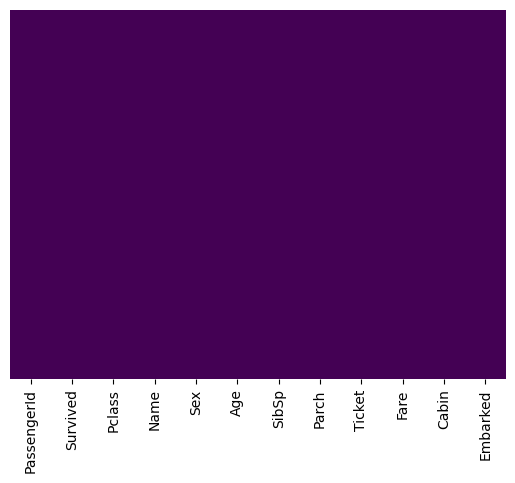

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [20]:
#droping unnecessary cloumns:

df.drop(["PassengerId","Ticket","Name","Cabin"],axis=1,inplace=True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [56]:
#look at the data types to see which col need to be encoded
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Visualize the data

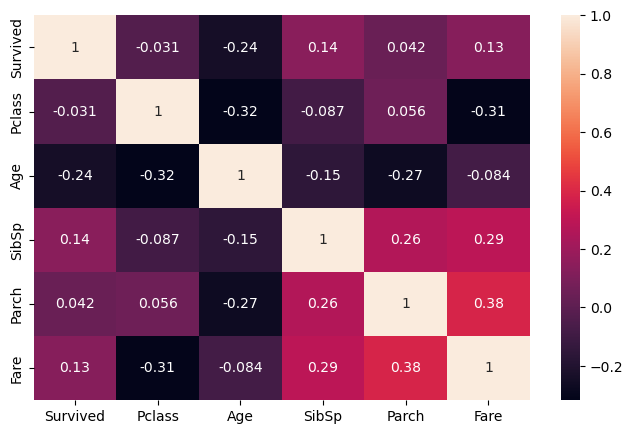

In [22]:
#Basic heatmap:

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

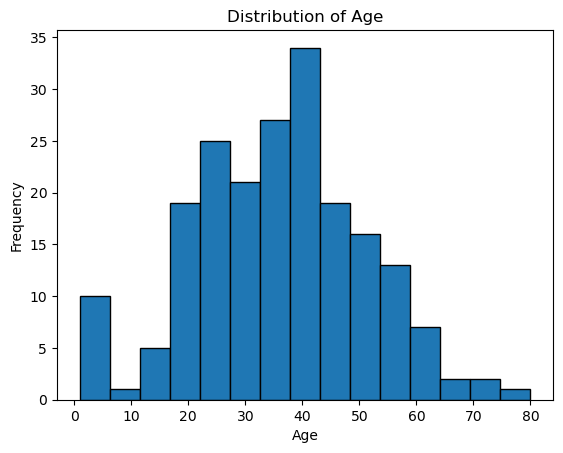

In [23]:
#Histogram of Age Distribution:

plt.hist(df['Age'], bins=15, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

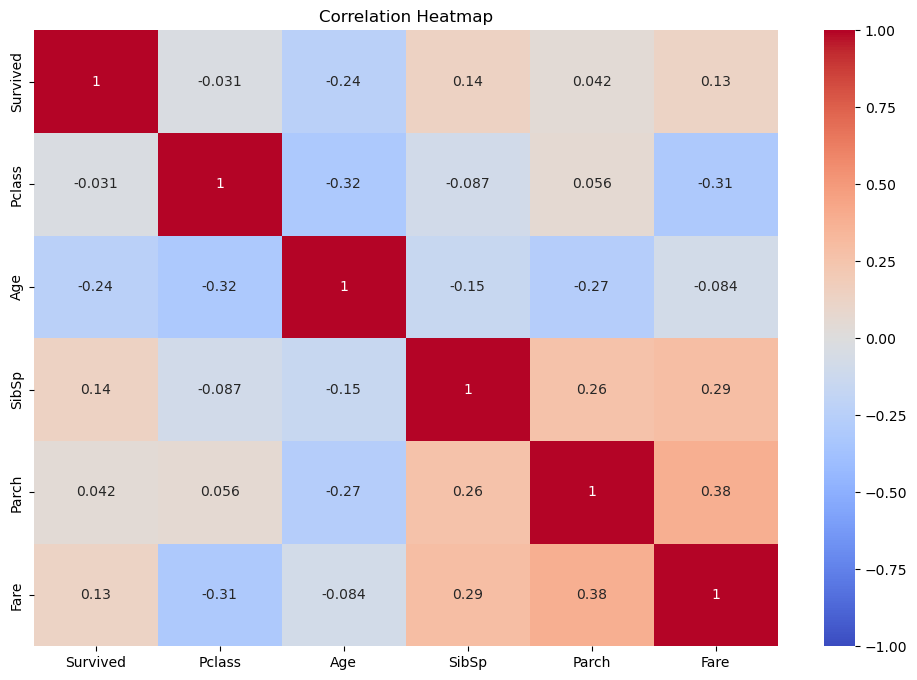

In [24]:
#Correlation Heatmap:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


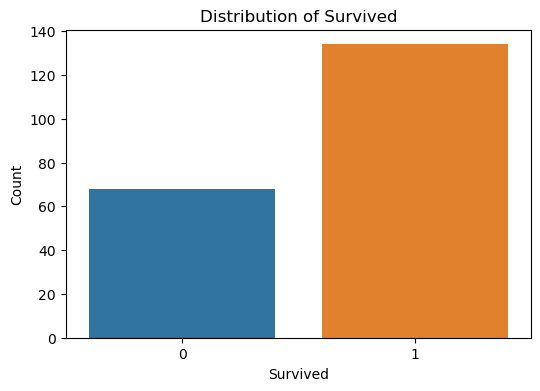

In [25]:
#Barplot of Survived :
    
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived')
plt.show()


In [57]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


In [26]:
#Let us Separate Numerical datatype columns and Object Datatype columns:

df_cat=df.select_dtypes('object')
df_num=df.select_dtypes(['float','int64'])

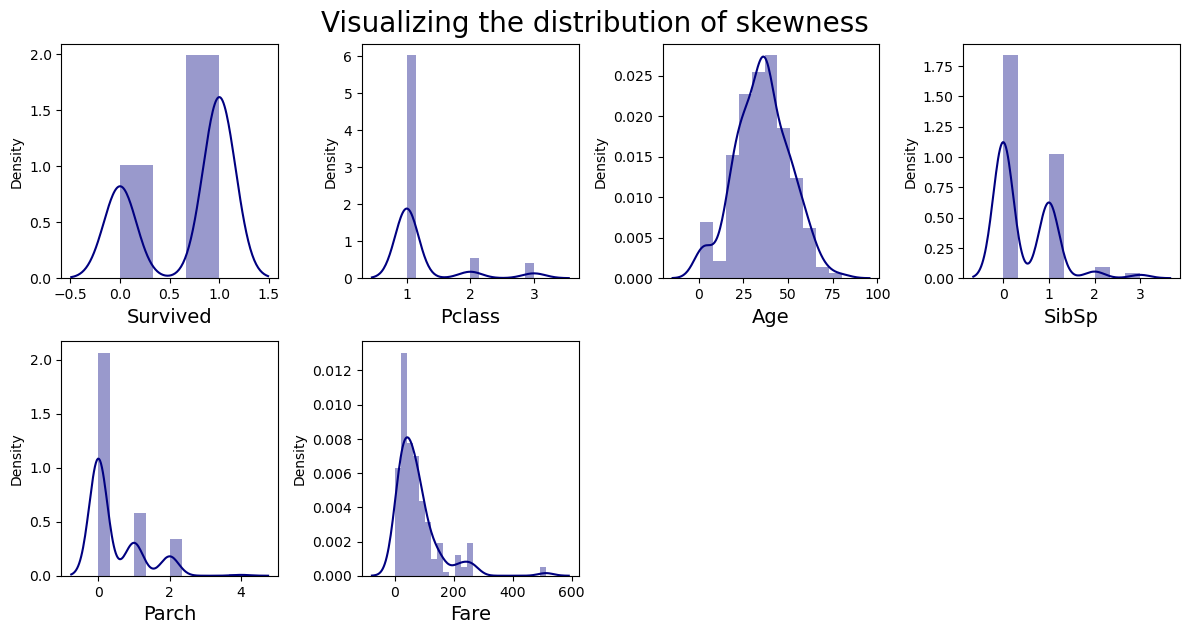

In [27]:
#We will see the skewness of all the numerical columns in our dataset by a distplot:

plt.figure(figsize=(12,12))
plt.suptitle("Visualizing the distribution of skewness",fontsize=20)
plotnumber=1
for column in df_num:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column],color="navy")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

In [30]:
#Feature Engineering:

x=df.iloc[:,1:]
y=df.iloc[:,0]

In [31]:
#Applying ordinalencoding on categorical columns of data:

from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[["Sex","Embarked"]]=oe.fit_transform(x[["Sex","Embarked"]])


In [32]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0.0,38.0,1,0,71.2833,0.0
3,1,0.0,35.0,1,0,53.1000,2.0
6,1,1.0,54.0,0,0,51.8625,2.0
10,3,0.0,4.0,1,1,16.7000,2.0
11,1,0.0,58.0,0,0,26.5500,2.0


In [33]:
x["Embarked"].value_counts()

2.0    129
0.0     69
1.0      4
Name: Embarked, dtype: int64

In [34]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 202, dtype: int64

In [35]:
#split the data set into training and testing 

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [36]:
from sklearn.metrics import classification_report, accuracy_score

In [37]:
#Developing Models:

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training Accuracy: {train}\nTesting Accuracy: {test}\n\n")
    print(classification_report(ytest,ypred))
    
    return model

In [38]:
# Train and evaluate a Gaussian Naive Bayes classifier:

nb = GaussianNB()
print("\nGaussian Naive Bayes:")
nb = mymodel(GaussianNB())


Gaussian Naive Bayes:
Training Accuracy: 0.7943262411347518
Testing Accuracy: 0.7704918032786885


              precision    recall  f1-score   support

           0       0.69      0.80      0.74        25
           1       0.84      0.75      0.79        36

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



In [39]:
# Train and evaluate a Decision Tree classifier:

dt = DecisionTreeClassifier()
print("\nDecision Tree:")
dt = mymodel( DecisionTreeClassifier())


Decision Tree:
Training Accuracy: 1.0
Testing Accuracy: 0.7377049180327869


              precision    recall  f1-score   support

           0       0.76      0.52      0.62        25
           1       0.73      0.89      0.80        36

    accuracy                           0.74        61
   macro avg       0.75      0.70      0.71        61
weighted avg       0.74      0.74      0.73        61



In [40]:
# Train and evaluate a Random Forest classifier:

rf = RandomForestClassifier()
print("\nRandom Forest:")
rf = mymodel(RandomForestClassifier())



Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.7377049180327869


              precision    recall  f1-score   support

           0       0.80      0.48      0.60        25
           1       0.72      0.92      0.80        36

    accuracy                           0.74        61
   macro avg       0.76      0.70      0.70        61
weighted avg       0.75      0.74      0.72        61



In [41]:
# Train and evaluate a support vector machine classifier:

svm = SVC()
print("\nSupport Vector Machine:")
svm = mymodel(SVC())



Support Vector Machine:
Training Accuracy: 0.6950354609929078
Testing Accuracy: 0.5901639344262295


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.59      1.00      0.74        36

    accuracy                           0.59        61
   macro avg       0.30      0.50      0.37        61
weighted avg       0.35      0.59      0.44        61



In [42]:
# Train and evaluate a Logistic Regression:

logreg=LogisticRegression()
print("\nLogistic Regression:")
logreg = mymodel(LogisticRegression())



Logistic Regression:
Training Accuracy: 0.7872340425531915
Testing Accuracy: 0.6885245901639344


              precision    recall  f1-score   support

           0       0.69      0.44      0.54        25
           1       0.69      0.86      0.77        36

    accuracy                           0.69        61
   macro avg       0.69      0.65      0.65        61
weighted avg       0.69      0.69      0.67        61



In [43]:
# Train and evaluate a KNeighbors Classifier:

knn= KNeighborsClassifier()
print("\nKNeighbors Classifier:")
knn = mymodel(KNeighborsClassifier())


KNeighbors Classifier:
Training Accuracy: 0.7588652482269503
Testing Accuracy: 0.5573770491803278


              precision    recall  f1-score   support

           0       0.33      0.08      0.13        25
           1       0.58      0.89      0.70        36

    accuracy                           0.56        61
   macro avg       0.46      0.48      0.42        61
weighted avg       0.48      0.56      0.47        61



In [44]:
# Train and evaluate a XGB Classifier:

!pip install xgboost
from xgboost import XGBClassifier

xgb =XGBClassifier()
print("\nXGB Classifier:")
xgb = mymodel(XGBClassifier())


     ---------------------------------------- 99.7/99.7 MB 2.6 MB/s eta 0:00:00



XGB Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.7377049180327869


              precision    recall  f1-score   support

           0       0.76      0.52      0.62        25
           1       0.73      0.89      0.80        36

    accuracy                           0.74        61
   macro avg       0.75      0.70      0.71        61
weighted avg       0.74      0.74      0.73        61



In [46]:
xgb = mymodel(XGBClassifier(max_depth=5))

Training Accuracy: 1.0
Testing Accuracy: 0.7213114754098361


              precision    recall  f1-score   support

           0       0.72      0.52      0.60        25
           1       0.72      0.86      0.78        36

    accuracy                           0.72        61
   macro avg       0.72      0.69      0.69        61
weighted avg       0.72      0.72      0.71        61



In [47]:
#Cross Validation Score:

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
# Define the models:

models = [('Log.Regression',LogisticRegression()),
          ('G.NaiveBayes', GaussianNB()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('XGBClassifier1', XGBClassifier()),
          ('XGBClassifier2', XGBClassifier(max_depth=2)),
          ('SVM          ', SVC()),
          ('K-NNClassifier',KNeighborsClassifier()),
          ]

In [50]:
# Evaluate each model using 5-fold cross-validation:

results = []
for name, model in models:
    scores = cross_val_score(model, x, y, cv=5)
    results.append((name, scores.mean(), scores.std()))


In [51]:
# Print the results:

print("Model\t\t\tAccuracy\tStandard deviation")
print("--------------------------------------------------------")
for name, mean, std in results:
    print(f"{name}\t\t{mean:.4f}\t\t{std:.4f}")

Model			Accuracy	Standard deviation
--------------------------------------------------------
Log.Regression		0.7671		0.0474
G.NaiveBayes		0.7620		0.0881
Decision Tree		0.7523		0.0573
Random Forest		0.7426		0.0514
XGBClassifier1		0.7276		0.0507
XGBClassifier2		0.7471		0.0744
SVM          		0.6634		0.0100
K-NNClassifier		0.5934		0.0673
